In [1]:
#@title
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import signal
plt.rcParams['axes.formatter.useoffset'] = False
import numpy as np
from scipy.optimize import curve_fit
import scipy as sp
from scipy import stats
import glob


In [2]:
#@title
#Funciones
from scipy import fftpack
def plot_espectro(senal,xmax,ymax):
    X = fftpack.fft(senal)
    plt.plot(fftpack.fftfreq(len(t[:]),1./365), np.abs(X))
    plt.ylim(0, ymax)
    plt.xlim(0, xmax)
    plt.xlabel('freq [años$^{-1}$]')
    plt.show()

from scipy.signal import filtfilt
def PasaBajos(senal):
  fs = 365 #pienso en años, como la unidad es el año, mi frec de muestreo es 365 muestras por año (señal en días)
  frec_c = 1.2 #Tres muestras por año o sea frecuencia de corte es un trimestre (2 sería 6 meses y es demasiado)
  nyq = .5*fs #Nysquits para pasarle al filtro
  frec = frec_c / nyq
  orden = 6
  b,a = scipy.signal.butter(orden,frec,'low',analog=False,output='ba') #Filtro butterworth
  y = scipy.signal.filtfilt(b,a,senal,axis=0)
  return y

def PasaAltos(senal):
  fs = 365 #pienso en años, como la unidad es el año, mi frec de muestreo es 365 muestras por año (señal en días)
  frec_c = 0.001 #Tres muestras por año o sea frecuencia de corte es un trimestre (2 sería 6 meses y es demasiado)
  nyq = .5*fs #Nysquits para pasarle al filtro
  frec = frec_c / nyq
  orden = 6
  b,a = scipy.signal.butter(orden,frec,'high',analog=False,output='ba') #Filtro butterworth
  y = scipy.signal.filtfilt(b,a,senal,axis=0)
  return y

def Polo(senal):
  fs = 365 #pienso en años, como la unidad es el año, mi frec de muestreo es 365 muestras por año (señal en días)
  nyq = .5*fs #Nysquits para pasarle al filtro
  z, p, k = signal.butter(0, 0.1/nyq, output='zpk', fs=fs)
  y = signal.filtfilt(z,p,senal)
  return y

def close_returns(senal):
    cr =  np.zeros((len(senal),5000)) #cr de close returns
    eps = (np.max(senal)-np.min(senal))*0.005
    for j in range(5000):
      for i in range(len(senal)-5000):
        if (np.abs(senal[i+j] - senal[i]) < eps):
          cr[i,j] = 1
    return cr

def embedding(tau,dato):
     w = 3
     tau = tau
     embedding = dato[(np.arange(w)*(tau+1))+ np.arange(np.max(dato.shape[0] - (w-1)*(tau+1), 0)).reshape(-1,1)]
     dim1 = embedding[:,0]
     dim2 = embedding[:,1]
     dim3 = embedding[:,2]
     return dim1, dim2, dim3

def remover_ma(dato,ventana):
  numbers_series = pd.Series(dato)
  window_size = ventana
  windows = numbers_series.rolling(window_size)
  moving_averages = windows.mean()
  moving_averages_list = moving_averages.tolist()
  without_nans = moving_averages_list[window_size - 1:]
  ones = np.ones(int((len(dato)-len(without_nans)+1)/2))*np.mean(dato)
  moving_average = np.concatenate([ones,without_nans,ones])
  correccion = np.ones(len(moving_average))*np.mean(moving_average) - moving_average
  corregido = dato + correccion[:-1]
  return corregido, moving_average


def plot_orbita(df,inicio,fin,color='-b'):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot(df[0][inicio:fin], df[1][inicio:fin], df[2][inicio:fin],color)
  #ax.set_xlim(23,30)
  #ax.set_ylim(23,30)
  #ax.set_zlim3d(23,30)
  return ax

def find_repeated_fragments(time_series, tolerancia=0.005, lag=25):
    fragmentos_repetidos = []
    series_length = len(time_series)
    
    for i in range(series_length - lag):
        fragmento = time_series[i:i + lag + 1]
        for j in range(i + lag + 1, series_length - lag):
            candidato = time_series[j:j + lag + 1]
            if len(fragmento) == len(candidato) and all(abs(fragmento[k] - candidato[k]) <= tolerancia for k in range(len(fragmento))):
                fragmentos_repetidos.append((i, j))
    
    return fragmentos_repetidos



10


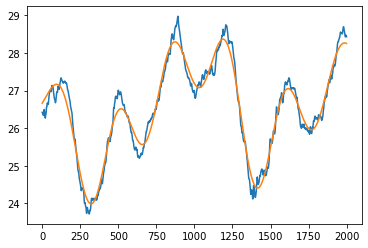

In [5]:
path_here = os.getcwd()
path_integraciones = path_here+'/ENSO_2020'
path_simulaciones_CESM = path_here+'/ENSO_2020'
# Abro simulacione
# s
lista=[]
lista=glob.glob(path_simulaciones_CESM+'/nino_senal_CESM2*.txt')
lista.sort()

print(len(lista))
lista

datos=np.loadtxt(lista[1])
nino_filtrado11 = PasaBajos(datos)
plt.plot(datos[:2000])
plt.plot(nino_filtrado11[:2000])

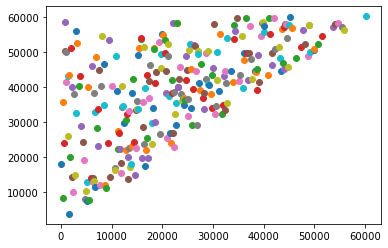

In [6]:
len(nino_filtrado11)
emb_dato = embedding(15,nino_filtrado11)
orbitas = find_repeated_fragments(nino_filtrado11[:])

orbitas_posta = []
orbita0 = orbitas[0]
orbitas_posta.append(orbita0)
for orbita in orbitas:
    if ((np.abs(orbita[0] - orbita0[0]) > 100) and (np.abs(orbita[1] - orbita0[1]) > 100)):
        orbitas_posta.append(orbita)
        orbita0 = orbita

for orbit in orbitas_posta:
    plt.scatter(orbit[0],orbit[1])

0.87
77.96
8.99
78.99
63.01
78.94
34.04
73.95
12.06
20.06
51.1
0.93
42.99
33.08
41.01
31.99
20.85
65.08
9.98
37.06
10.0
38.12
29.02
44.05
54.92
37.01
24.02
10.0
53.0
27.02
35.04
26.98
18.05
48.98
27.93
7.02
7.04
42.07
33.98
56.07
30.92
30.96
21.95
20.03
35.02
14.96
37.95
15.93
42.98
35.04
53.96
26.89
8.89
33.93
22.88
34.98
7.98
37.82
3.07
23.06
22.3
27.04
2.96
20.09
26.07
40.99
6.94
11.98
20.02
7.96
17.01
6.0
22.97
4.08
8.94
17.92
17.99
2.08
25.9
19.88
6.95
18.01
17.98
19.06
10.9
17.96
14.0
18.83
14.06
9.94
3.04
7.13
2.99
5.22


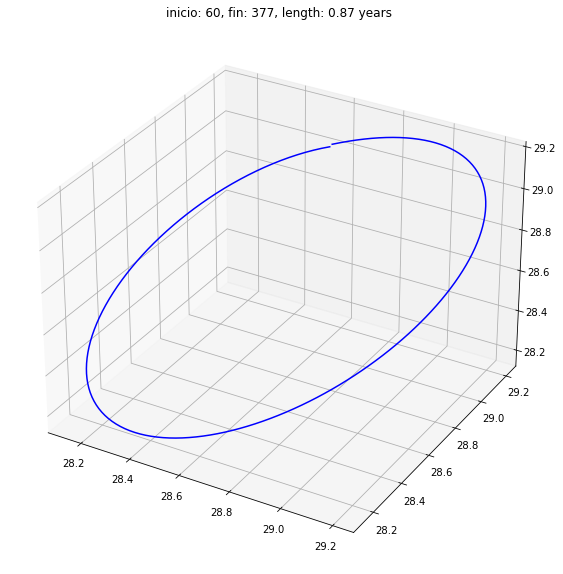

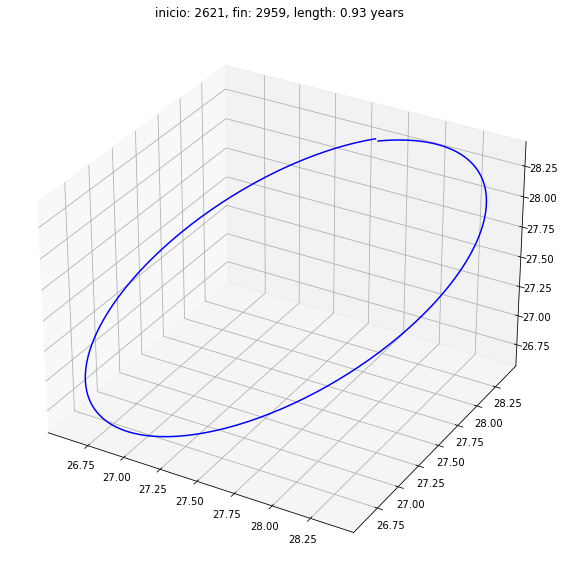

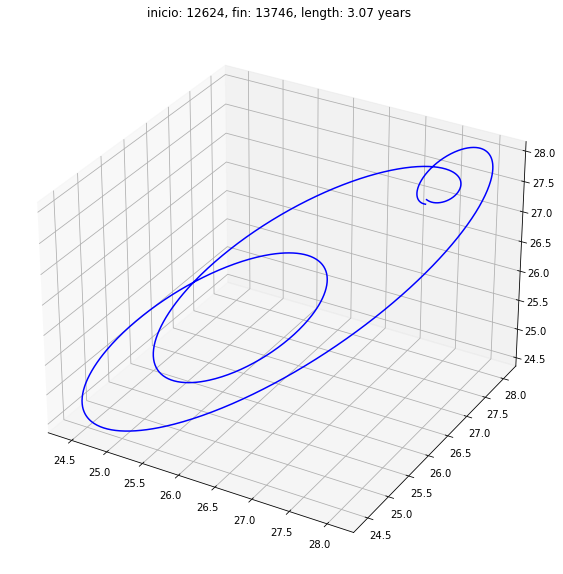

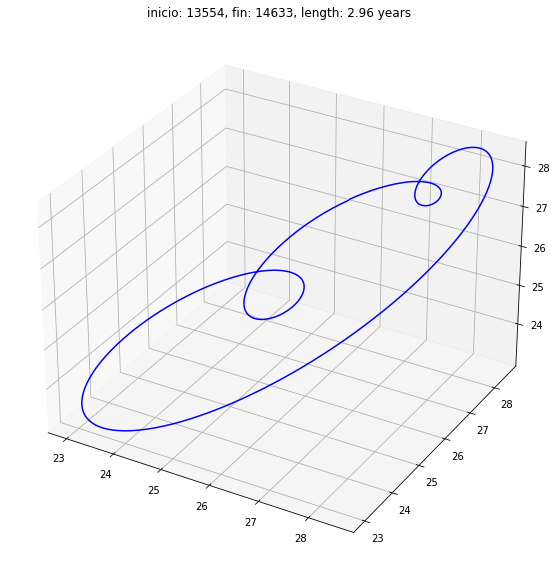

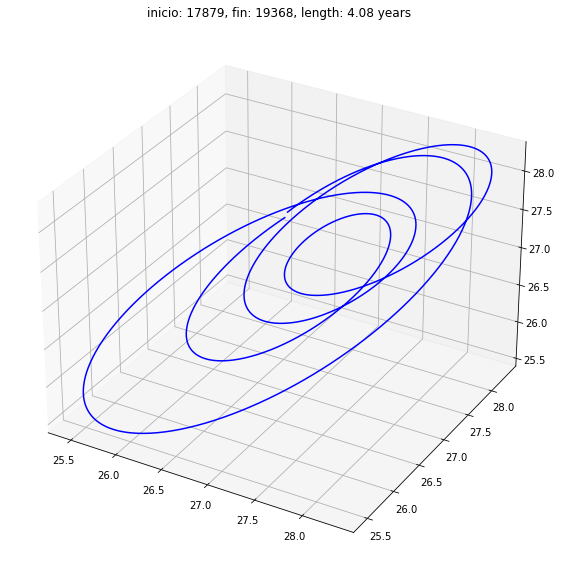

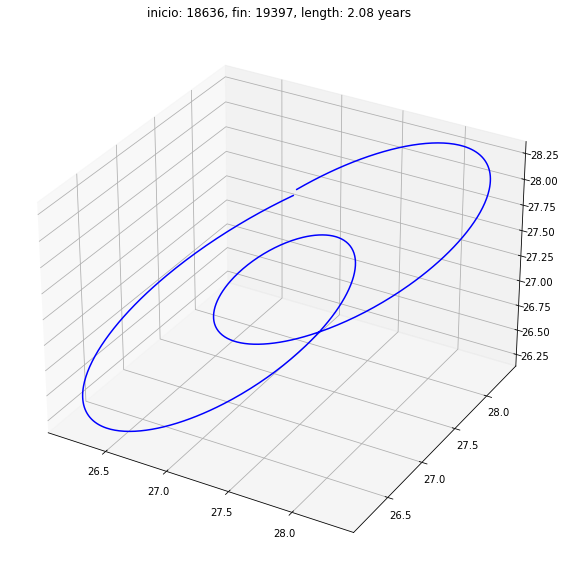

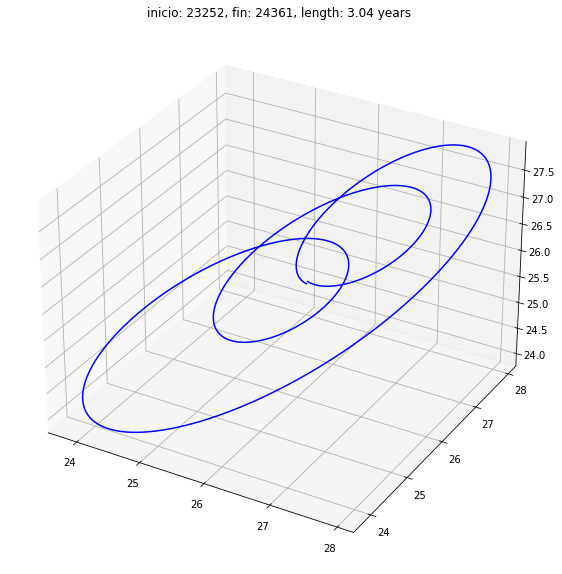

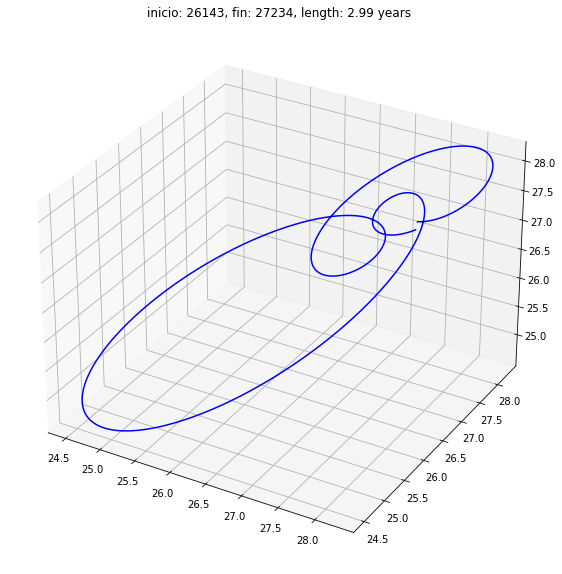

In [148]:
for orbita in orbitas_posta:
    len_orbit = round((orbita[1] - orbita[0])/365,2)
    print(len_orbit)
    if len_orbit < 5:
        plot_orbita(emb_dato,orbita[0],orbita[1])
        plt.title('inicio: '+str(orbita[0])+', fin: '+str(orbita[1])+', length: '+str(round((orbita[1] - orbita[0])/365,2))+' years')

## Orbitas periodicas

In [ ]:
for orbita in orbitas_posta:
    len_orbit = round((orbita[1] - orbita[0])/365,2)
    print(len_orbit)
    if len_orbit < 5:
        plot_orbita(emb_dato,orbita[0],orbita[1])
        plt.title('inicio: '+str(orbita[0])+', fin: '+str(orbita[1])+', length: '+str(round((orbita[1] - orbita[0])/365,2))+' years')

### Close returns

In [8]:
def close_returns(datos,lag_max=3000,tol=0.005):
    eps = (np.max(datos)-np.min(datos))*tol
    cr =  np.zeros((lag_max,len(datos) - lag_max)) 
    for lag in range(lag_max-1000):
        lagg = lag+1
        lagg2 = lag+1000
        datos_lag = datos[lagg:]
        datos_lag2 = datos[lagg2:]
        dif = np.where((datos[:-lagg2] - datos_lag2 < eps),1,0)
        dif = dif[:-(lag_max - lagg2)]
        cr[lag,:] = dif
    
    return cr



In [9]:
corregido1, moving_average = remover_ma(nino_filtrado11,2000)
corregido, moving_average2 = remover_ma(corregido1,2000)

close = close_returns(corregido,3000,1*1*10e-20)
df_close = pd.DataFrame(close[0:2000,1:10000])
cr = df_close.values

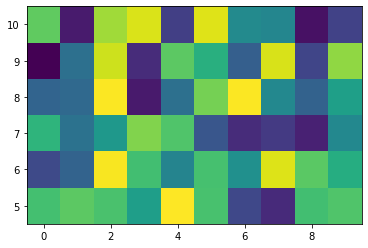

In [22]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

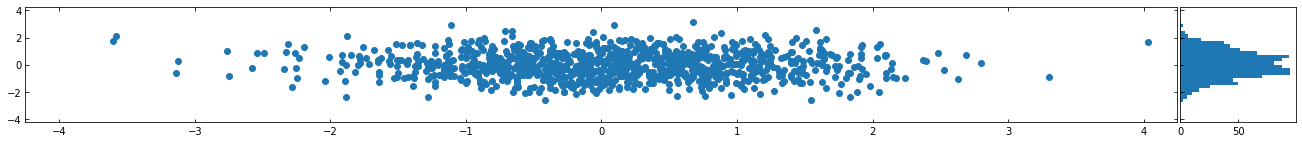

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# definitions for the axes
left, width = 0.1, 2
bottom, height = 0.1, 0.2
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
#ax_histx = plt.axes(rect_histx)
#ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
#ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

#ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()